## In this notebook, amplicon data of two different marker genes from the same samples will be imported as raw read counts. After modeling ASV occurrences as probability distributions and extracting principal components of both data sets, a Bayesian linear model will be fit to estimate the parameters of a normal likelihood.

### Import all the dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import subprocess

### Move to working directory

In [2]:
os.chdir("/Users/nastassia.patin/GitHub/MarineDNA/Data")

## 01. This section imports the amplicon data sets as raw counts and calls an R script to model the ASV occurrences as probability distributions. 

#### Import amplicon data sheets as pandas dataframes and take a look

In [3]:
file1 = "Flyer2018_16S_table_counts.tsv"
file2 = "Flyer2018_18S_table_counts.tsv"
asvs1 = pd.read_csv(file1, index_col=0, sep="\t")
asvs2 = pd.read_csv(file2, index_col=0, sep="\t")

In [4]:
asvs1

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
495c1bd1608a1dad54d3e2824ce899ef,552,7415,8749,8152,7124,12422,215,8080,8799,2231,...,4324,1339,95,1554,147,2720,21,2015,1847,1886
a900b6678ce86851fb16bfafb87f3326,210,1933,2808,1967,1671,4912,57,3688,3343,1134,...,21023,8898,1367,8291,1112,9881,60,8726,9330,8852
c8e360969108fa2125a3d56eb4dad24f,145,2089,2530,2086,2343,2395,129,1625,1664,639,...,4830,9,566,20,551,60,43,22,28,44
72143fd9e63fe40c1258948d2f0d79c3,130,1830,2516,2178,2256,3332,56,2535,2316,629,...,4227,83,512,75,497,154,48,97,116,80
7b6b178fad5599c0e9a734e4fb09fd64,156,1742,1761,1855,1812,2467,73,1663,1612,515,...,2385,47,287,45,520,104,50,57,72,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674933a0d44342a0647f7a5b4591f26e,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bebe1b9a7e9aaa78172c1208111f4570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0128431733f67d02efad766d717fe6fd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
asvs2

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_1,1,0,3,0,0,3,0,1,7,2,...,7,2,3,2,1,2,1,2,5,4
ASV_2,0,0,0,0,0,0,0,0,1,0,...,2,0,0,0,2,1,2,1,1,1
ASV_3,2,0,23,6,5,0,0,3,1,0,...,1,86,2,51,2,94,2,12,24,13
ASV_4,7,13521,3,2215,23301,16490,9,5,19,3199,...,4,0,1,1,0,1,2,0,1,3
ASV_5,11,13,31,40,23,34,37,19,42,15,...,3001,15,2707,32,610,53,1833,46,64,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_12614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_12622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_12628,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


### Call the R script to model the ASV count distributions

#### Function to run R program on input data given the file name

In [6]:
def call_Rscript_for_amplicon_modeling(path, sample_num, arg1):
    # Use subprocess.Popen to open executable Rscript and extract stdout from 'print' command in R
    with subprocess.Popen(["Rscript", path, "--args", "--vanilla", arg1], 
                          stdout=subprocess.PIPE) as result:
        asvs_freq = result.stdout.read()
    
    # The R output gets imported as "bytes"; need to convert to string and remove whitespace
    y = asvs_freq.decode("utf-8")
    y = y.split()

    # Convert to numpy array
    array = np.asarray(y)
    # Reshape to original dimensions; number of samples (columns) is second field, 
    # unknown number of ASVs can be supplied with '-1'
    mat = np.reshape(array, (-1, sample_num))

    # Convert to data frame with float values instead of strings
    df = pd.DataFrame(mat)
    df = df.astype(float)
    return(df)

#### Define the arguments (Rscript path)

In [7]:
path_to_rscript = "/Users/nastassia.patin/GitHub/MarineDNA/ranRelPct_testdata.R"

#### Run the function in a loop over both amplicon data sets and make a list of two data frames

In [8]:
df = []

for file in [file1, file2]:
    asvs = pd.read_csv(file, index_col=0, sep='\t')
    number_of_samples = len(asvs.axes[1])
    asvs_modeled = call_Rscript_for_amplicon_modeling(path_to_rscript,
                                      number_of_samples,
                                      file)
    df.append(asvs_modeled)

#### Separate the two data frames into the 16S and 18S modeled ASV counts and transpose for PCA

In [9]:
df_16S = df[0].T
df_18S = df[1].T

#### Perform a log-odds transform on the count probabilities (with natural log base e)

In [10]:
df_16S_logodds = np.log(df_16S)
df_18S_logodds = np.log(df_18S)

#### Add column and row names

In [11]:
df_16S.columns = list(asvs1.index)
df_16S.index = list(asvs1.columns)
df_18S.columns = list(asvs2.index)
df_18S.index = list(asvs2.columns)

In [12]:
df_16S

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,0.078575,0.026310,0.020724,0.021095,0.022934,0.006699,0.000157,0.013179,0.027785,0.014921,...,2.675397e-04,0.000308,0.000390,1.813856e-04,0.000234,0.000076,0.000006,0.000094,0.000236,0.000318
CN18Fc19_5_eDNA,0.168358,0.043740,0.048614,0.042913,0.039488,0.011911,0.005591,0.013227,0.016948,0.021451,...,5.762832e-07,0.000031,0.000023,6.721208e-07,0.000029,0.000002,0.000017,0.000006,0.000010,0.000024
CN18Fc21_6_eDNA,0.134430,0.043606,0.037413,0.038204,0.026781,0.011280,0.010190,0.017474,0.023713,0.019526,...,3.480240e-05,0.000006,0.000010,8.968874e-06,0.000014,0.000036,0.000047,0.000002,0.000005,0.000050
CN18Fc22_6_eDNA,0.152744,0.037286,0.040400,0.039587,0.035434,0.009794,0.006658,0.013612,0.019067,0.018230,...,5.054999e-06,0.000011,0.000005,2.041580e-06,0.000013,0.000036,0.000021,0.000003,0.000007,0.000026
CN18Fc24_6_eDNA,0.133149,0.031000,0.042835,0.041578,0.032590,0.013228,0.005956,0.015935,0.022627,0.015708,...,2.449126e-06,0.000027,0.000010,6.717689e-06,0.000024,0.000024,0.000015,0.000017,0.000004,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,0.045670,0.164559,0.001066,0.002542,0.001837,0.010522,0.046859,0.003147,0.001954,0.005102,...,1.274237e-05,0.000013,0.000004,4.586350e-05,0.000017,0.000004,0.000050,0.000010,0.000027,0.000003
CN18SESPkoa_SC44,0.003166,0.008894,0.006148,0.008079,0.006967,0.041207,0.000087,0.031088,0.003189,0.000022,...,2.800801e-04,0.000067,0.000140,1.018891e-04,0.000051,0.000129,0.000158,0.000410,0.000066,0.000087
CN18SESPkoa_SC45,0.037599,0.164590,0.000525,0.001631,0.001313,0.006677,0.054242,0.002128,0.001828,0.002883,...,3.465037e-05,0.000014,0.000050,5.964385e-05,0.000050,0.000022,0.000014,0.000036,0.000016,0.000010
CN18SESPkoa_SC47,0.031057,0.152553,0.000345,0.001744,0.001119,0.005243,0.040317,0.001382,0.001239,0.003778,...,7.992383e-06,0.000030,0.000006,3.443147e-05,0.000007,0.000006,0.000026,0.000008,0.000011,0.000043


#### Export as tab-separated files

In [13]:
# Untransformed
df_16S.to_csv("Flyer2018_16S_counts_modeled.tsv", sep="\t")
df_18S.to_csv("Flyer2018_18S_counts_modeled.tsv", sep="\t")

In [14]:
# Log-odds transformed
df_16S_logodds.to_csv("Flyer2018_16S_counts_modeled_logodds.tsv", sep="\t")
df_18S_logodds.to_csv("Flyer2018_18S_counts_modeled_logodds.tsv", sep="\t")

## 02. Reduce dimensionality and visualize principal components

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

#### From untransformed matrices

In [16]:
# Untransformed 16S
pca = PCA(n_components=62)
pca.fit_transform(df_16S)
variance_array_16S = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array_16S

array([ 61.61338587,  90.67447154,  93.27625073,  95.41199962,
        96.68587848,  97.33998237,  97.78981366,  98.13239798,
        98.40680588,  98.63762332,  98.84950348,  99.01421551,
        99.16885464,  99.27486622,  99.36435673,  99.43392903,
        99.49380497,  99.53999753,  99.57990539,  99.61763284,
        99.65028246,  99.67729564,  99.70219996,  99.72410723,
        99.74450733,  99.76362684,  99.77953244,  99.79365954,
        99.80750255,  99.8195939 ,  99.83113312,  99.8424242 ,
        99.85250871,  99.86246514,  99.87114779,  99.87949929,
        99.88749984,  99.89514523,  99.90266309,  99.90957027,
        99.91633199,  99.92248378,  99.92858337,  99.93444882,
        99.940023  ,  99.94541409,  99.95056279,  99.9552844 ,
        99.959953  ,  99.96445861,  99.9688258 ,  99.97280216,
        99.97647434,  99.98005833,  99.98337953,  99.98661247,
        99.98966006,  99.99249396,  99.99516514,  99.99767887,
       100.        , 100.        ])

In [17]:
# Untransformed 18S
pca = PCA(n_components=62)
pca.fit_transform(df_18S)
variance_array_18S = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array_18S

array([ 27.01916127,  44.47152057,  61.70139986,  69.53210245,
        76.43468491,  80.91389974,  84.92249819,  87.13748577,
        89.13884596,  90.78166268,  92.25658016,  93.37635281,
        94.4591679 ,  95.31905698,  96.12994488,  96.66702145,
        97.17324767,  97.56512696,  97.82037266,  98.07008283,
        98.28380517,  98.48150334,  98.67240927,  98.85764228,
        98.99284111,  99.0878656 ,  99.17772475,  99.25795094,
        99.32639877,  99.38085706,  99.43026351,  99.47604029,
        99.51605795,  99.55323175,  99.58918965,  99.62207637,
        99.65439122,  99.68301606,  99.70831333,  99.73231647,
        99.75416818,  99.77487925,  99.79475272,  99.81325625,
        99.83095829,  99.84817972,  99.86348146,  99.87832339,
        99.89245459,  99.90553659,  99.91738432,  99.92854461,
        99.93944581,  99.94985868,  99.95924578,  99.96757877,
        99.97557449,  99.98305598,  99.9901082 ,  99.99558755,
       100.        , 100.        ])

#### From log-odds transformed matrices

In [18]:
# Log-odds transformed 16S
pca = PCA(n_components=62)
pca.fit_transform(df_16S_logodds)
variance_array_16S_logodds = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array_16S_logodds

array([ 19.78290356,  28.90545866,  35.37007222,  37.56717793,
        39.51017962,  41.22028834,  42.77502095,  44.2700967 ,
        45.6883434 ,  47.0723078 ,  48.42516006,  49.74810457,
        51.04015999,  52.3019696 ,  53.56294484,  54.81317653,
        56.03997997,  57.26320328,  58.46984442,  59.67341837,
        60.86491782,  62.05101573,  63.23226982,  64.388804  ,
        65.54356775,  66.68950766,  67.82382404,  68.93705267,
        70.04230649,  71.13962152,  72.21828774,  73.29081253,
        74.35385136,  75.40871099,  76.45547527,  77.48622949,
        78.50969095,  79.528125  ,  80.5375698 ,  81.52972912,
        82.51276761,  83.49250928,  84.45880465,  85.41456164,
        86.35916176,  87.29610769,  88.22115808,  89.1324195 ,
        90.03552547,  90.93058633,  91.8141658 ,  92.67803255,
        93.53439224,  94.38353853,  95.21650773,  96.045105  ,
        96.85543759,  97.65968444,  98.45643655,  99.2421391 ,
       100.        , 100.        ])

In [19]:
# Log-odds transformed 18S
pca = PCA(n_components=62)
pca.fit_transform(df_18S_logodds)
variance_array_18S_logodds = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array_18S_logodds

array([ 17.81484326,  22.84840933,  26.45735487,  29.15971941,
        31.35175513,  33.11264408,  34.62102286,  36.10426692,
        37.55933381,  38.99391929,  40.40677034,  41.79844738,
        43.16891948,  44.53240187,  45.87729875,  47.21524786,
        48.54297969,  49.86769736,  51.1882024 ,  52.49806037,
        53.7959738 ,  55.08506753,  56.37226369,  57.65053009,
        58.92407738,  60.19188095,  61.4473493 ,  62.69745332,
        63.93850364,  65.17629761,  66.40925381,  67.63369533,
        68.85492759,  70.06661072,  71.27143542,  72.47044674,
        73.65537137,  74.83328918,  76.00645285,  77.17685868,
        78.34229694,  79.49636011,  80.64600112,  81.78366764,
        82.91544943,  84.04362159,  85.16701409,  86.28217758,
        87.38858605,  88.49075133,  89.58114477,  90.66482756,
        91.73859007,  92.80121669,  93.86008152,  94.90495562,
        95.94619333,  96.97797313,  98.00436423,  99.00908311,
       100.        , 100.        ])

### Plot components vs variance explained

#### Based on the results above we will use the variances generated from the raw (untransformed) count probabilities

### Function to format variance numpy array for seaborn plot

In [20]:
def format_variance_data_for_plotting(variance_array):
    df = pd.DataFrame(variance_array, columns = ["Explained variance"])
    df = df.reset_index(level=0)
    df['index'] = df['index'] + 1
    df = df.rename(columns = {"index" : "Component number"})
    return(df)

#### Apply function to raw count probabilities

[Text(0.5, 1.0, 'Principal components of ASV count probabilities')]

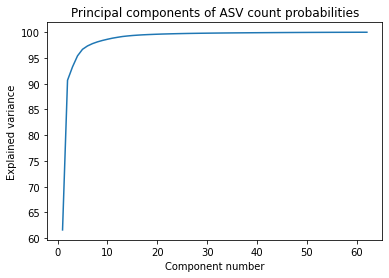

In [21]:
# 16S count data
df_variance = format_variance_data_for_plotting(variance_array_16S)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of ASV count probabilities') 

[Text(0.5, 1.0, 'Principal components of ASV count probabilities')]

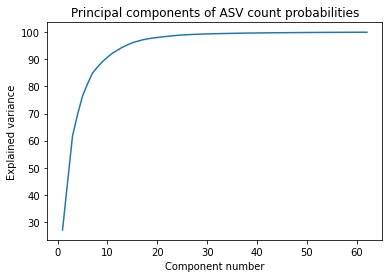

In [22]:
# 18S count data
df_variance = format_variance_data_for_plotting(variance_array_18S)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of ASV count probabilities') 

### Plot principal components of raw ASV count probabilities

[Text(0.5, 1.0, '16S PCA, raw count probabilities')]

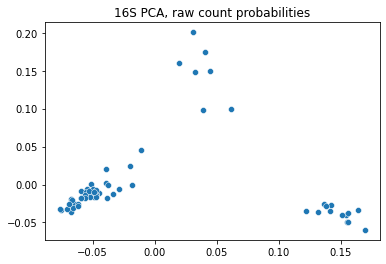

In [23]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(df_16S)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values).set(title="16S PCA, raw count probabilities")

[Text(0.5, 1.0, '18S PCA, raw count probabilities')]

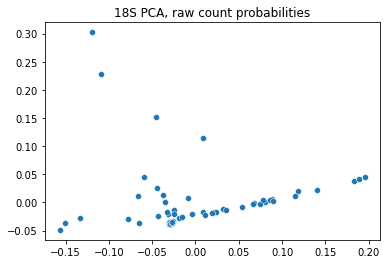

In [24]:
ca = PCA(n_components=3)
pcs = pca.fit_transform(df_18S)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values).set(title="18S PCA, raw count probabilities")

## 03. Test the power of 16S data as a predictor for 18S data

### Function to extract defined number of PCs with sample labels

In [25]:
def extract_PCs_labeled(df_asvs_modeled, num_pcs):
    pca = PCA(n_components=num_pcs)
    pcs = pca.fit_transform(df_asvs_modeled)
    array = pcs[:, :num_pcs]
    cols = list()
    for i in range(1, num_pcs+1):
        n="PC%s" % i
        cols.append(n)
    df = pd.DataFrame(array, index=df_16S.index, columns = cols)
    return(df)

#### Export the first six PCs of the 16S data which explain 97% of the variance

In [65]:
pcs_16S = extract_PCs_labeled(df_16S, 6)
pcs_16S.to_csv("Flyer2018_16S_PCs.tsv", sep="\t")
pcs_16S

,PC1,PC2,PC3,PC4,PC5,PC6
CN18Fc12_8_eDNA,-0.020128,0.023832,-0.024139,0.038050,-0.016783,0.001938
CN18Fc19_5_eDNA,-0.075552,-0.033142,0.010200,-0.011909,0.003156,-0.002386
CN18Fc21_6_eDNA,-0.048505,-0.016760,-0.003077,0.003165,-0.006532,0.004679
CN18Fc22_6_eDNA,-0.066767,-0.022830,0.005425,-0.001503,-0.004624,0.003922
CN18Fc24_6_eDNA,-0.059178,-0.008103,-0.005169,0.006752,-0.001524,0.001449
...,...,...,...,...,...,...
CN18SESPkoa_SC42,0.131701,-0.035945,0.003022,-0.002341,-0.002827,0.002591
CN18SESPkoa_SC44,0.032810,0.148524,-0.005046,0.012712,-0.028669,-0.015435
CN18SESPkoa_SC45,0.141820,-0.035358,0.004186,0.004716,-0.003955,0.000039
CN18SESPkoa_SC47,0.136522,-0.025320,-0.000650,0.013615,-0.006447,-0.002134


#### Export the first two PCs of the 18S data for which we will test the 16S predictive power

### Pass results of 16S and 18S PCAs to Bayesian modeling R Script

#### Function to run the Bayesian model in the R script "jagsPClm.R" by passing in the PCs extracted from the 16S and 18S modeled count data

In [72]:
def bayesian_modeling_of_two_markergenes(path, pcs_18s, preds_16s, samples):
    # Use subprocess.Popen to open executable Rscript and extract stdout from 'print' command in R
    with subprocess.Popen(["Rscript", path, "--args", "--vanilla", pcs_18s,
                      preds_16s, samples], stdout=subprocess.PIPE) as result:
        bayes_summary = result.stdout.read()
    # Convert bytes to string
    x = bayes_summary.decode("utf-8")
    # Remove newline symbol
    y = x.replace("\n", "" ).split()
    z = [ x for x in y if "\"" in x ]
    # Convert to numpy array
    array = np.asarray(z)
    # Reshape array to dimensions of post.summary matrix
    mat = np.reshape(array, (-1, 12))

    # Convert to data frame
    df = pd.DataFrame(mat)
    # Remove all the " from string values
    for i, col in enumerate(df.columns):
        df.iloc[:, i] = df.iloc[:, i].str.replace('"', '')
    # Convert first row to column names and first column to row names (index)
    df.columns = df.loc[0, :]
    df = df[1:]
    df = df.set_index(df.columns[0])
    # Convert strings to floats
    df = df.astype(float)
    return(df)

#### Define variables based on PCA results from above; can only pass strings to R script

In [48]:
path_to_rscript = "/Users/nastassia.patin/GitHub/MarineDNA/PC_bayesian_runner_test.R"
num_18S_PCs = "2" # Number of PCs to predict in 18S data
num_16S_preds = "6" # Number of predictor PCs to use from 16S data; as many as account for expected variance of predictor
num_ind = "62" # Number of observances (samples) in 18S data

#### Run the function and display summary output

In [73]:
bayes_summary_16S_18S = bayesian_modeling_of_two_markergenes(path_to_rscript, 
                                                             num_18S_PCs, 
                                                             num_16S_preds,
                                                             num_ind)
bayes_summary_16S_18S

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.100,psrf
rownames,,,,,,,,,,,
deviance,-342.679000,-332.192000,-319.157000,-331.490360,6.298315,-333.454920,0.062425,1.0,10179.0,-0.009541,1.000209
intercept[1],-0.017850,0.000105,0.018308,0.000116,0.009301,0.000029,0.000091,1.0,10427.0,-0.002916,1.000069
intercept[2],-0.014033,0.000020,0.014940,0.000108,0.007339,-0.000137,0.000073,1.0,10229.0,-0.004473,0.999874
"b[1,1]",-0.479246,-0.257751,-0.037061,-0.257542,0.113556,-0.260426,0.001142,1.0,9891.0,0.018354,1.000320
"b[2,1]",-0.528859,-0.226009,0.107751,-0.225331,0.162921,-0.231119,0.001604,1.0,10322.0,-0.010851,1.000203
"b[3,1]",-0.664079,0.420886,1.482150,0.421961,0.549141,0.416565,0.005357,1.0,10508.0,-0.026610,0.999951
"b[4,1]",-1.975270,-0.789489,0.400204,-0.784456,0.610097,-0.772493,0.005958,1.0,10487.0,-0.002461,1.000014
"b[5,1]",-0.801062,0.817904,2.290830,0.822822,0.782164,0.797983,0.007777,1.0,10115.0,0.000108,1.000546
"b[6,1]",-4.157030,-1.984040,0.120096,-1.982377,1.094324,-1.990076,0.010670,1.0,10520.0,0.002732,0.999917
